In [1]:
#importing the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
data=pd.read_csv('PRODUCT SALES.csv')

In [3]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,01-01-17,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,01-01-17,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,01-01-17,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,01-01-17,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,01-01-17,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Age_Group_NUMBER  113036 non-null  int64  
 7   Customer_Gender   113036 non-null  object 
 8   Country           113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Order_Quantity    113036 non-null  int64  
 11  Unit_Cost         113036 non-null  float64
 12  Unit_Price        113036 non-null  float64
 13  Profit            113036 non-null  float64
 14  Cost              113036 non-null  float64
 15  Revenue           113036 non-null  float64
dtypes: float64(5), int64

In [5]:
#the data has no null value

In [6]:
#checking the unique values of age_group_number
data['Age_Group_NUMBER'].unique()

array([1])

In [7]:
#Age_group_number column doesn't make sense
#using label encoding we are going to create a new column as age_group_number
#dropping Age_Group_Number
data.drop(['Age_Group_NUMBER'],axis=1,inplace=True)

In [8]:
data['Age_group_number']=LabelEncoder().fit_transform(data['Age_Group'])
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_group_number
0,01-01-17,1,January,2017,17,Youth (<25),M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0,3
1,01-01-17,1,January,2017,23,Youth (<25),M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0,3
2,01-01-17,1,January,2017,33,Young Adults (25-34),F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0,2
3,01-01-17,1,January,2017,39,Adults (35-64),M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0,0
4,01-01-17,1,January,2017,42,Adults (35-64),M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,31-12-21,31,December,2021,52,Adults (35-64),F,United Kingdom,Bikes,2,1555.0,2443.0,1776.0,3110.0,4886.0,0
113032,31-12-21,31,December,2021,25,Young Adults (25-34),F,Germany,Bikes,1,713.0,1120.0,407.0,713.0,1120.0,2
113033,31-12-21,31,December,2021,26,Young Adults (25-34),M,Australia,Bikes,1,713.0,1120.0,407.0,713.0,1120.0,2
113034,31-12-21,31,December,2021,33,Young Adults (25-34),F,Australia,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0,2


In [9]:
#finding the years
data['Year'].unique()

array([2017, 2018, 2019, 2020, 2021])

In [10]:
#finding different age groups
data['Age_Group'].unique()

array(['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)',
       'Seniors (64+)'], dtype=object)

In [11]:
#finding different product categories
data['Product_Category'].unique()

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

In [12]:
#finding the countries where sales is done
data['Country'].unique()

array(['canada', 'Australia', 'France', 'United States', 'United Kingdom',
       'Germany'], dtype=object)

In [13]:
#checking product_category for the year 2017
p_c=data.loc[data['Year']==2017,'Product_Category'].unique()
print(p_c)

['Bikes']


In [14]:
#removing 2017 year data from the dataset as it may cause bias bcs of sales done on only bikes

data=data.drop(data[data['Year']==2017].index)

In [15]:
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_group_number
2677,01-01-18,1,January,2018,19,Youth (<25),F,United States,Bikes,1,2171.0,3578.0,1407.0,2171.0,3578.0,3
2678,01-01-18,1,January,2018,27,Young Adults (25-34),F,Australia,Bikes,1,713.0,1120.0,407.0,713.0,1120.0,2
2679,01-01-18,1,January,2018,29,Young Adults (25-34),F,United States,Bikes,1,487.0,783.0,296.0,487.0,783.0,2
2680,01-01-18,1,January,2018,29,Young Adults (25-34),M,United States,Bikes,1,487.0,783.0,296.0,487.0,783.0,2
2681,01-01-18,1,January,2018,36,Adults (35-64),F,United States,Bikes,1,1266.0,2320.0,1054.0,1266.0,2320.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,31-12-21,31,December,2021,52,Adults (35-64),F,United Kingdom,Bikes,2,1555.0,2443.0,1776.0,3110.0,4886.0,0
113032,31-12-21,31,December,2021,25,Young Adults (25-34),F,Germany,Bikes,1,713.0,1120.0,407.0,713.0,1120.0,2
113033,31-12-21,31,December,2021,26,Young Adults (25-34),M,Australia,Bikes,1,713.0,1120.0,407.0,713.0,1120.0,2
113034,31-12-21,31,December,2021,33,Young Adults (25-34),F,Australia,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0,2


# EXPLORATORY DATA ANALYSIS

Finding total revenue  for the years(2018-2021)

In [16]:
data['Revenue'].sum()

84886648.0

Finding revenue per each year

In [17]:
Revenue_per_year=data.groupby('Year')['Revenue'].sum()
print(Revenue_per_year)

Year
2018    17028380.0
2019    15705990.0
2020    22405052.0
2021    29747226.0
Name: Revenue, dtype: float64


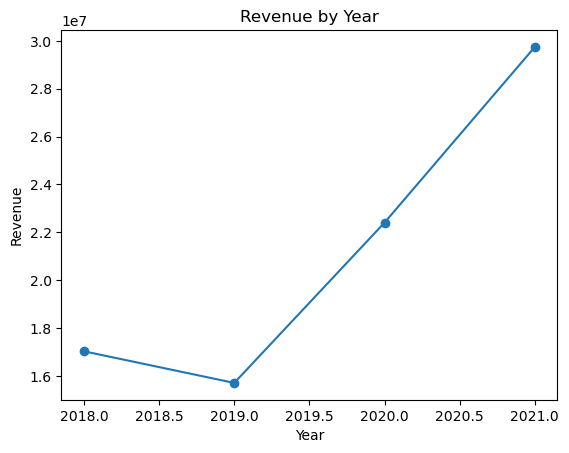

In [18]:
Revenue_per_year.plot.line(marker='o')

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year')
plt.grid(False)
plt.show()

In [19]:
#barplot
Revenue_per_year=list(Revenue_per_year)

In [20]:
print(Revenue_per_year)

[17028380.0, 15705990.0, 22405052.0, 29747226.0]


In [21]:
Year=list(data['Year'].unique())

Text(0.5, 1.0, 'Revenue per year')

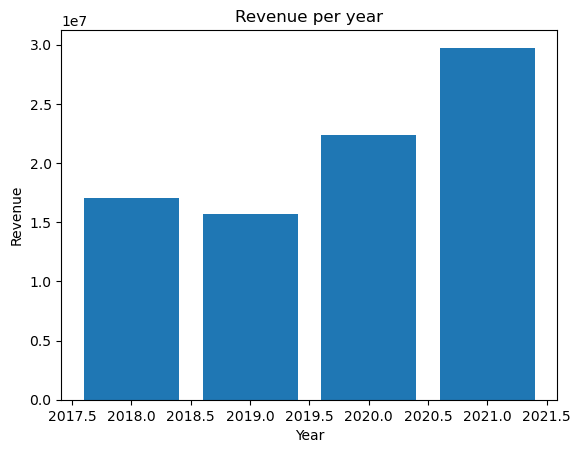

In [22]:
plt.bar(Year,Revenue_per_year)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue per year')

Contribution of product category towards revenue each year

In [23]:
Product_revenue_in_eachyear=data.groupby(['Year','Product_Category'])['Revenue'].sum()
print(Product_revenue_in_eachyear)

Year  Product_Category
2018  Accessories          3738605.0
      Bikes               11076907.0
      Clothing             2212868.0
2019  Accessories          4749418.0
      Bikes                8475942.0
      Clothing             2480630.0
2020  Accessories          3630112.0
      Bikes               16625836.0
      Clothing             2149104.0
2021  Accessories          4594511.0
      Bikes               22739841.0
      Clothing             2412874.0
Name: Revenue, dtype: float64


Finding the most and least performing dates

In [24]:
data['Date'] = pd.to_datetime(data['Date'])
daily_revenue = data.groupby('Date')['Revenue'].sum()
daily_revenue_sorted = daily_revenue.sort_values(ascending=False)

top_date = daily_revenue_sorted.idxmax()
bottom_date = daily_revenue_sorted.idxmin()
top_day = top_date.day
bottom_day = bottom_date.day

if top_day < 15:
    top_category = "Beginning of the month"
    bottom_category = "End of the month"
else:
    top_category = "End of the month"
    bottom_category = "Beginning of the month"

if daily_revenue[top_date] > daily_revenue[bottom_date]:
    more_revenue_category = top_category
    more_revenue_date = top_date
else:
    more_revenue_category = bottom_category
    more_revenue_date = bottom_date

print("Most Performing Date:", top_date)
print("Least Performing Date:", bottom_date)
print("Segment with More Revenue:", more_revenue_category)

Most Performing Date: 2021-01-03 00:00:00
Least Performing Date: 2021-04-11 00:00:00
Segment with More Revenue: Beginning of the month


<AxesSubplot:title={'center':'Sales by Day of the Month'}, xlabel='Day of the Month', ylabel='Total Revenue'>

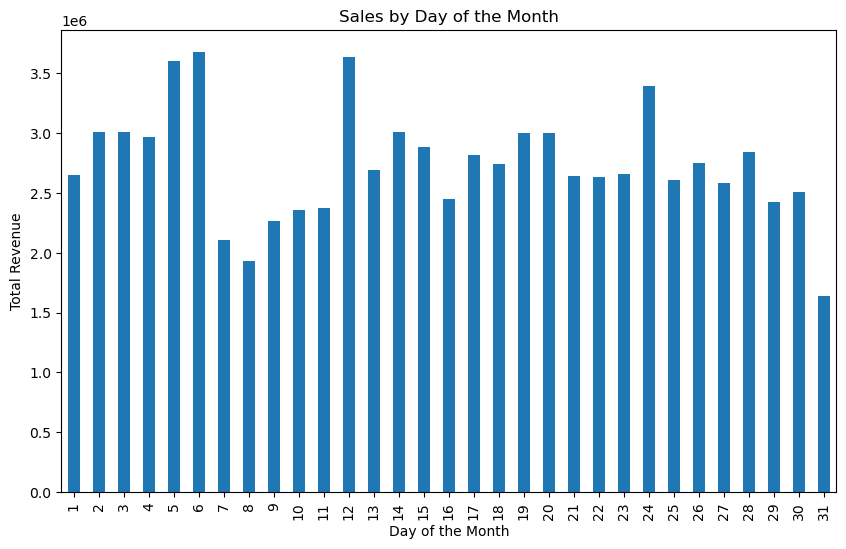

In [25]:
# visualization:
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Month'] = data['Date'].dt.day
sales_by_day_of_month = data.groupby('Day_of_Month')['Revenue'].sum()
sales_by_day_of_month.plot(kind='bar', figsize=(10, 6), xlabel='Day of the Month', ylabel='Total Revenue', title='Sales by Day of the Month')

In [26]:
#Sales by Day of the Month
sales_by_day = data.groupby('Day')['Revenue'].sum()
sales_by_day = sales_by_day.sort_index()

print("Sales by day of the month:")
print(sales_by_day)

Sales by day of the month:
Day
1     2814351.0
2     2565345.0
3     3054561.0
4     2644610.0
5     2637328.0
6     2881827.0
7     3147978.0
8     2993901.0
9     2615299.0
10    2379107.0
11    2899374.0
12    2969743.0
13    2695634.0
14    3012434.0
15    2881965.0
16    2448962.0
17    2815077.0
18    2741941.0
19    3000191.0
20    2998464.0
21    2638984.0
22    2637248.0
23    2660630.0
24    3399150.0
25    2608641.0
26    2751971.0
27    2584219.0
28    2839733.0
29    2422391.0
30    2509189.0
31    1636400.0
Name: Revenue, dtype: float64


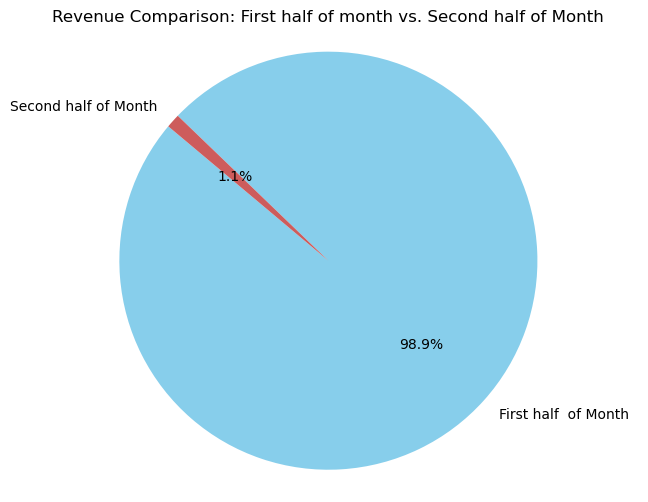

In [49]:
segments = ['First half  of Month', 'Second half of Month']
revenues = [daily_revenue[top_date], daily_revenue[bottom_date]]
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'indianred']
plt.pie(revenues, labels=segments, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Revenue Comparison: First half of month vs. Second half of Month')
plt.axis('equal')
plt.show()

Spending pattern of females and males and in which category do they spend a lot.

In [28]:
gender_category_spending = data.groupby(['Customer_Gender', 'Product_Category'])['Profit'].sum()
gender_category_spending = gender_category_spending.reset_index()
gender_category_spending_pivot = gender_category_spending.pivot(index='Product_Category', columns='Customer_Gender', values='Profit')

# Product category with the highest spending for each gender
max_spending_male_category = gender_category_spending_pivot['M'].idxmax()
max_spending_female_category = gender_category_spending_pivot['F'].idxmax()
print("Spending pattern of males and females:")
print(gender_category_spending_pivot)
print("\nProduct category with the highest spending for males:", max_spending_male_category)
print("Product category with the highest spending for females:", max_spending_female_category)

Spending pattern of males and females:
Customer_Gender            F           M
Product_Category                        
Accessories        4903073.0   5553958.0
Bikes             11914350.0  11965308.0
Clothing           1708816.0   2015225.0

Product category with the highest spending for males: Bikes
Product category with the highest spending for females: Bikes


The top product categories in each country:

In [29]:
country_product_sales = data.groupby(['Country', 'Product_Category'])['Revenue'].sum()
top_products_by_country = country_product_sales.groupby('Country').idxmax()

print("\nTop product categories in each country:")
print(top_products_by_country)


Top product categories in each country:
Country
Australia              (Australia, Bikes)
France                    (France, Bikes)
Germany                  (Germany, Bikes)
United Kingdom    (United Kingdom, Bikes)
United States      (United States, Bikes)
canada                    (canada, Bikes)
Name: Revenue, dtype: object


Country with the highest quantity sold

In [30]:
country_sales = data.groupby('Country').agg({'Order_Quantity': 'sum', 'Revenue': 'sum'})
max_quantity_country = country_sales['Order_Quantity'].idxmax()
max_quantity = country_sales['Order_Quantity'].max()
print(f"The country with the most products sold by quantity is {max_quantity_country} with {max_quantity} products.")

The country with the most products sold by quantity is United States with 475817 products.


Country with the highest sales revenue


In [31]:
max_sales_country = country_sales['Revenue'].idxmax()
max_sales = country_sales['Revenue'].max()
print(f"The country with the highest sales revenue is {max_sales_country} with ${max_sales}.")

The country with the highest sales revenue is United States with $27338270.0.


Product with the highest quantity sold

In [32]:
product_sales = data.groupby('Product_Category')['Order_Quantity'].sum()
max_quantity_product = product_sales.idxmax()
max_quantity = product_sales.max()
print(f"The product that sold the most is {max_quantity_product} with {max_quantity} units sold.")

The product that sold the most is Accessories with 1054162 units sold.


Products based on profit:

In [33]:
product_performance = data.groupby('Product_Category').agg({'Revenue': 'sum', 'Cost': 'sum'})
product_performance['Profit'] = product_performance['Revenue'] - product_performance['Cost']
product_performance = product_performance.sort_values(by='Profit', ascending=False)
print("Top-performing product lines based on profit:")
print(product_performance.head())

Top-performing product lines based on profit:
                     Revenue        Cost      Profit
Product_Category                                    
Bikes             58918526.0  35038868.0  23879658.0
Accessories       16712646.0   6255615.0  10457031.0
Clothing           9255476.0   5531435.0   3724041.0


# CUSTOMER SEGMENTATION

Finding revenue based on gender

In [34]:

Revenue_based_on_gender=data.groupby('Customer_Gender')['Revenue'].sum()
print((Revenue_based_on_gender))
labels=Revenue_based_on_gender.index.tolist()
print(labels)

Customer_Gender
F    41482036.0
M    43404612.0
Name: Revenue, dtype: float64
['F', 'M']


In [35]:
Revenue_based_on_gender=Revenue_based_on_gender.tolist()
print(Revenue_based_on_gender)

[41482036.0, 43404612.0]


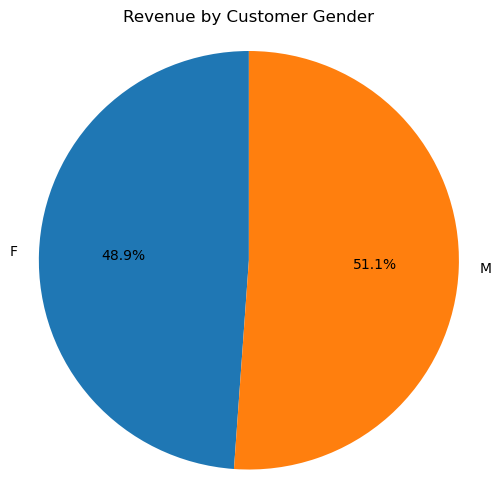

In [36]:
plt.figure(figsize=(6, 6))
plt.pie(Revenue_based_on_gender, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Revenue by Customer Gender')
plt.show()

In [37]:
Product_revenue_in_eachyear_byagegroup=data.groupby(['Year','Age_Group','Product_Category'])['Revenue'].sum()
print(Product_revenue_in_eachyear_byagegroup)

Year  Age_Group             Product_Category
2018  Adults (35-64)        Accessories          1776030.0
                            Bikes                4896764.0
                            Clothing              993420.0
      Seniors (64+)         Accessories            23709.0
                            Bikes                  11756.0
                            Clothing                8750.0
      Young Adults (25-34)  Accessories          1314264.0
                            Bikes                4505817.0
                            Clothing              774877.0
      Youth (<25)           Accessories           624602.0
                            Bikes                1662570.0
                            Clothing              435821.0
2019  Adults (35-64)        Accessories          2615637.0
                            Bikes                5059067.0
                            Clothing             1469418.0
      Seniors (64+)         Accessories            44940.0
           

In [38]:
#customer contribution towards revenue based on age group.
Revenue_byagegroup=data.groupby(['Age_Group'])['Revenue'].sum()
print(Revenue_byagegroup)

Age_Group
Adults (35-64)          42745146.0
Seniors (64+)             314214.0
Young Adults (25-34)    30416111.0
Youth (<25)             11411177.0
Name: Revenue, dtype: float64


In [39]:
label1=Revenue_byagegroup.index.tolist()
print(label1)
Revenue_byAge_group=Revenue_byagegroup.tolist()
print(Revenue_byAge_group)

['Adults (35-64)', 'Seniors (64+)', 'Young Adults (25-34)', 'Youth (<25)']
[42745146.0, 314214.0, 30416111.0, 11411177.0]


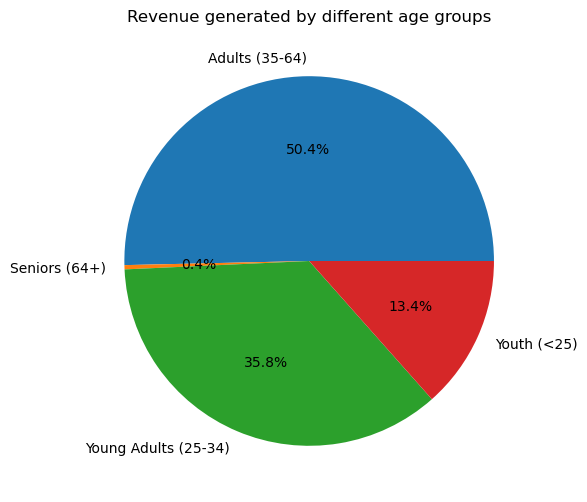

In [40]:
#piechart
plt.figure(figsize=(6,6))
plt.pie(Revenue_byAge_group,labels=label1,autopct='%1.1f%%')
plt.title('Revenue generated by different age groups')
plt.show()

In [41]:
#Customers based on countries
country_sales = data.groupby('Country')['Revenue'].sum()
country_sales = country_sales.sort_values(ascending=False)
print("Top countries by total revenue:")
print(country_sales)
country_to_focus = country_sales.idxmin()

print("\nCountry with the lowest revenue for potential focus:")
print(country_to_focus)

Top countries by total revenue:
Country
United States     27338270.0
Australia         22383572.0
United Kingdom    10220330.0
Germany            9054427.0
France             8719389.0
canada             7170660.0
Name: Revenue, dtype: float64

Country with the lowest revenue for potential focus:
canada


In [42]:
Countries=country_sales.index.tolist()
print(Countries)

['United States', 'Australia', 'United Kingdom', 'Germany', 'France', 'canada']


In [43]:
Revenue_bycountry=country_sales.tolist()
print(Revenue_bycountry)

[27338270.0, 22383572.0, 10220330.0, 9054427.0, 8719389.0, 7170660.0]


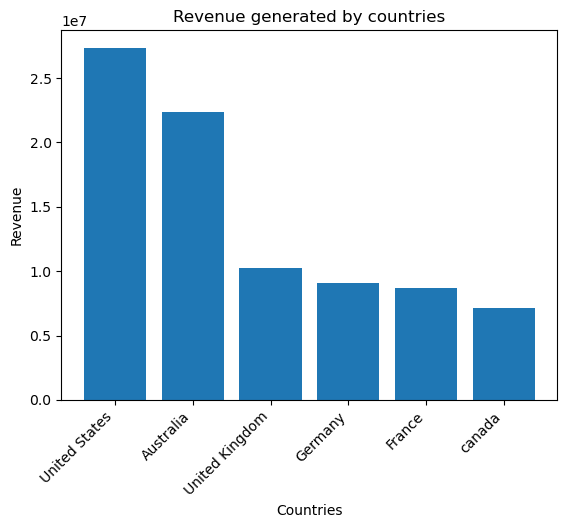

In [44]:
#barplot
plt.bar(Countries,Revenue_bycountry)
plt.xlabel('Countries')
plt.ylabel('Revenue')
plt.title('Revenue generated by countries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
Revenue_byagegroup_category=data.groupby(['Age_Group','Product_Category'])['Revenue'].sum()
print(Revenue_byagegroup_category)


Age_Group             Product_Category
Adults (35-64)        Accessories          8644264.0
                      Bikes               29242493.0
                      Clothing             4858389.0
Seniors (64+)         Accessories           135845.0
                      Bikes                 124308.0
                      Clothing               54061.0
Young Adults (25-34)  Accessories          5552444.0
                      Bikes               21825893.0
                      Clothing             3037774.0
Youth (<25)           Accessories          2380093.0
                      Bikes                7725832.0
                      Clothing             1305252.0
Name: Revenue, dtype: float64


In [46]:
Revenue=Revenue_byagegroup_category.tolist()
print(Revenue)
Product_category=Revenue_byagegroup_category.index.tolist()
print(Product_category)

[8644264.0, 29242493.0, 4858389.0, 135845.0, 124308.0, 54061.0, 5552444.0, 21825893.0, 3037774.0, 2380093.0, 7725832.0, 1305252.0]
[('Adults (35-64)', 'Accessories'), ('Adults (35-64)', 'Bikes'), ('Adults (35-64)', 'Clothing'), ('Seniors (64+)', 'Accessories'), ('Seniors (64+)', 'Bikes'), ('Seniors (64+)', 'Clothing'), ('Young Adults (25-34)', 'Accessories'), ('Young Adults (25-34)', 'Bikes'), ('Young Adults (25-34)', 'Clothing'), ('Youth (<25)', 'Accessories'), ('Youth (<25)', 'Bikes'), ('Youth (<25)', 'Clothing')]


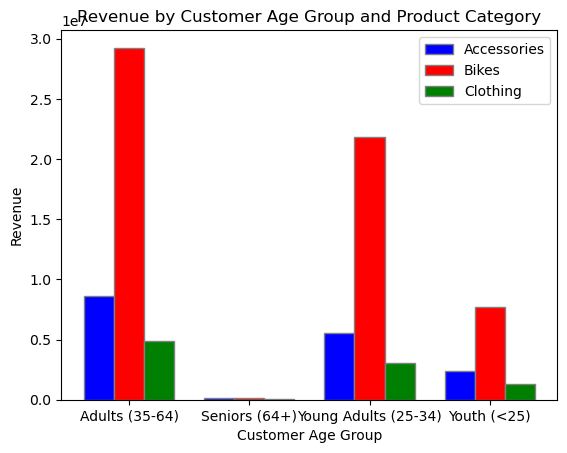

In [47]:

revenue_data = Revenue
categories = ['Adults (35-64)', 'Seniors (64+)', 'Young Adults (25-34)', 'Youth (<25)']
products = ['Accessories', 'Bikes', 'Clothing']
grouped_data = [[], [], []]
for i, (category, product) in enumerate([('Adults (35-64)', 'Accessories'), ('Adults (35-64)', 'Bikes'), ('Adults (35-64)', 'Clothing'), ('Seniors (64+)', 'Accessories'), ('Seniors (64+)', 'Bikes'), ('Seniors (64+)', 'Clothing'), ('Young Adults (25-34)', 'Accessories'), ('Young Adults (25-34)', 'Bikes'), ('Young Adults (25-34)', 'Clothing'), ('Youth (<25)', 'Accessories'), ('Youth (<25)', 'Bikes'), ('Youth (<25)', 'Clothing')]):
    grouped_data[products.index(product)].append(revenue_data[i])
barWidth = 0.25
r1 = range(len(categories))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, grouped_data[0], color='b', width=barWidth, edgecolor='grey', label='Accessories')
plt.bar(r2, grouped_data[1], color='r', width=barWidth, edgecolor='grey', label='Bikes')
plt.bar(r3, grouped_data[2], color='g', width=barWidth, edgecolor='grey', label='Clothing')
plt.xlabel('Customer Age Group')
plt.ylabel('Revenue')
plt.xticks([r + barWidth for r in range(len(categories))], categories)
plt.title('Revenue by Customer Age Group and Product Category')
plt.legend()
plt.show()


/var/folders/31/274xd2cx6f31vmsj_351h2340000gn/T/ipykernel_16380/710462733.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/31/274xd2cx6f31vmsj_351h2340000gn/T/ipykernel_16380/710462733.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(marked_countries.geometry.centroid.x, marked_countries.geometry.centroid.y, marked_countries['name']):


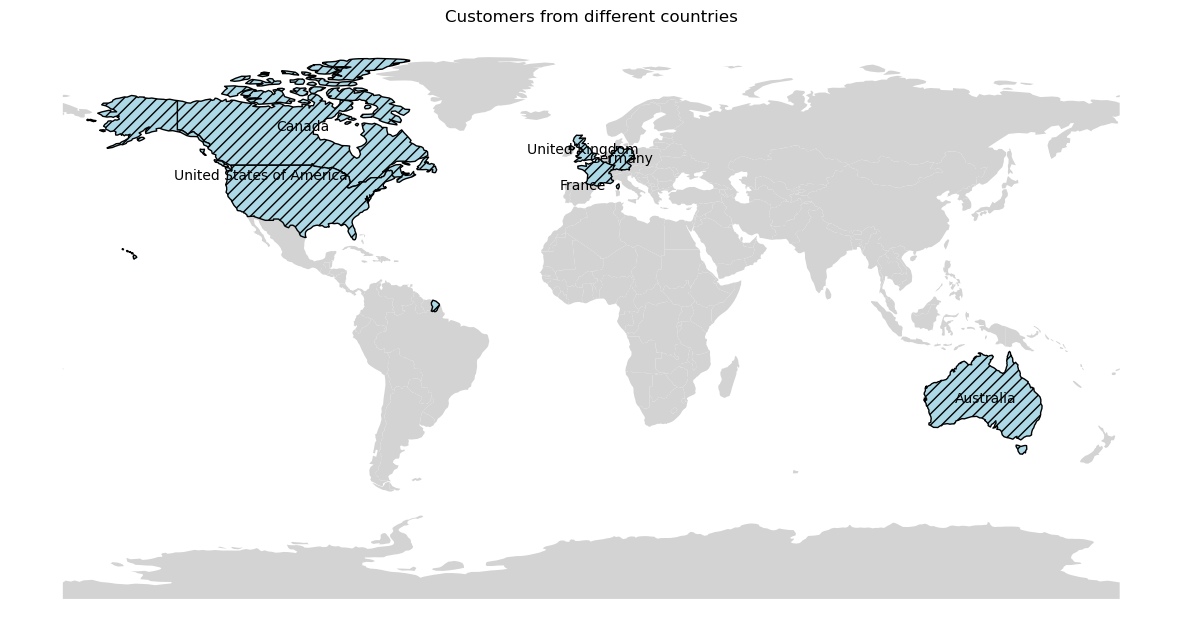

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries_to_mark =  ['Canada', 'Australia', 'France', 'United States of America', 'United Kingdom', 'Germany']

marked_countries = world[world['name'].isin(countries_to_mark)]
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
marked_countries.plot(ax=ax, color='lightblue', edgecolor='black', hatch='///')
for x, y, label in zip(marked_countries.geometry.centroid.x, marked_countries.geometry.centroid.y, marked_countries['name']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center', color='black')
plt.title('Customers from different countries')
plt.axis('off')
plt.show()
